# Weeding Planar Recommendation 

#### Import libaries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# read file 
# df = pd.read_excel('Wedding-planner-dataset.xlsx')
user_df = pd.read_excel('User-dataset.xlsx')
rating_df = pd.read_excel('Rating-dataset.xlsx')

In [3]:
from openpyxl import load_workbook
import pandas as pd

# Replace 'file_path.xlsx' with the path to your Excel file
file_path = 'Wedding-planner-dataset.xlsx'

# Load the workbook
workbook = load_workbook(filename=file_path)

# Select the active worksheet
worksheet = workbook.active

# Collect data from each row and column
data = []
for row in worksheet.iter_rows(values_only=True):
    data.append(row)

# Convert the collected data into a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,0,1,2,3,4,5,6,7
0,ID,Name,Location,City,CategoryName,None,Image,Phone
1,1,الحمد للأجهزه الكهربائيه,"شارع الملك حفني,عصافره بحري",Alexandria,Electrical Appliance,None,https://lh3.googleusercontent.com/LVmRtjE1rKJG...,35525080
2,2,شركة الفارس,"شارع جمال عبد الناصر,امام السواق الشريف",Alexandria,Electrical Appliance,None,https://lh5.googleusercontent.com/p/AF1QipMDx7...,1229291521
3,3,LG shaheen,"55 Port Said St, Al Ibrahimeyah Bahri WA Sidi ...",Alexandria,Electrical Appliance,None,https://lh5.googleusercontent.com/p/AF1QipMo2m...,1221163393
4,4,Hany-Electricity Machines,"5 Mohammed Hasan Fahmy, Al Ibrahimeyah Qebli W...",Alexandria,Electrical Appliance,None,None,None


In [4]:
df.columns = df.iloc[0]

In [5]:
df.head(5)

,ID,Name,Location,City,CategoryName,None,Image,Phone
0,ID,Name,Location,City,CategoryName,None,Image,Phone
1,1,الحمد للأجهزه الكهربائيه,"شارع الملك حفني,عصافره بحري",Alexandria,Electrical Appliance,None,https://lh3.googleusercontent.com/LVmRtjE1rKJG...,35525080
2,2,شركة الفارس,"شارع جمال عبد الناصر,امام السواق الشريف",Alexandria,Electrical Appliance,None,https://lh5.googleusercontent.com/p/AF1QipMDx7...,1229291521
3,3,LG shaheen,"55 Port Said St, Al Ibrahimeyah Bahri WA Sidi ...",Alexandria,Electrical Appliance,None,https://lh5.googleusercontent.com/p/AF1QipMo2m...,1221163393
4,4,Hany-Electricity Machines,"5 Mohammed Hasan Fahmy, Al Ibrahimeyah Qebli W...",Alexandria,Electrical Appliance,None,None,None


In [6]:
df.tail()

,ID,Name,Location,City,CategoryName,None,Image,Phone
896,896,"Arty location, لوكيشن آرتي","عزبة توفيق, Tell El Kebir, Ismailia Governorate",Ismailia,Photographer,None,https://lh5.googleusercontent.com/p/AF1QipOL4x...,1011975112
897,897,ستديو فوتو رومانس Ahmed Romance Photoghraphy,"178 Zakareya Ahmed, Al Temsah, Ismailia 1, Ism...",Ismailia,Photographer,None,https://lh5.googleusercontent.com/p/AF1QipMtwN...,1000832335
898,898,Photo salma,"العشريني, El Sheikh Zayed, Ismailia 2, Ismaili...",Ismailia,Photographer,None,https://lh5.googleusercontent.com/p/AF1QipPz0r...,1272394676
899,899,( ستوديو ميدو ) Studio Medo High Class,"٦ Mohammed Sabry Mbdy, El Sheikh Zayed, Ismail...",Ismailia,Photographer,None,https://lh5.googleusercontent.com/p/AF1QipOEOJ...,1225832209
900,900,Ahmed Kamel Photography,"Al-Esbetalia, Al Temsah, Ismailia 1, Ismailia ...",Ismailia,Photographer,None,https://lh3.googleusercontent.com/oJYoVT5gski2...,1285934128


In [7]:
user_df.head()

,User_id,City
0,2001,Alexandria
1,2002,Alexandria
2,2003,Alexandria
3,2004,Alexandria
4,2005,Alexandria


In [8]:
rating_df.head()

,User_id,ID,Rating
0,2001,1,3.0
1,2002,1,2.0
2,2003,1,3.0
3,2004,1,3.0
4,2005,1,3.0


In [9]:
df.isna().sum()

0
ID                0
Name              0
Location          0
City              0
CategoryName      0
None            901
Image             0
Phone             0
dtype: int64

In [10]:
df = df.dropna(axis=1, how='all')
df.isna().sum()


0
ID              0
Name            0
Location        0
City            0
CategoryName    0
Image           0
Phone           0
dtype: int64

In [11]:
user_df.isna().sum()

User_id    0
City       0
dtype: int64

In [12]:
rating_df.isna().sum()

User_id    0
ID         0
Rating     2
dtype: int64

In [13]:
rating_df["Rating"].replace(np.nan, 0, inplace=True)
rating_df.isna().sum()

User_id    0
ID         0
Rating     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            901 non-null    object
 1   Name          901 non-null    object
 2   Location      901 non-null    object
 3   City          901 non-null    object
 4   CategoryName  901 non-null    object
 5   Image         901 non-null    object
 6   Phone         901 non-null    object
dtypes: object(7)
memory usage: 49.4+ KB


In [15]:
ratingscount = pd.DataFrame(rating_df["Rating"].value_counts())
ratingscount.reset_index(inplace=True)

# Sort by the "Book-Rating" in ascending order
ratingscount.sort_values(by="Rating", inplace=True)

# Resetting the index after sorting
ratingscount.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
ratingscount

,Rating,count
0,0.0,12
1,1.0,333
2,2.0,2133
3,3.0,6692
4,4.0,7667
5,5.0,7925
6,33.0,1
7,44.0,1
8,54.0,1


In [16]:
ratingscount = ratingscount.drop(index=[6, 7, 8])

In [17]:
ratingscount

,Rating,count
0,0.0,12
1,1.0,333
2,2.0,2133
3,3.0,6692
4,4.0,7667
5,5.0,7925


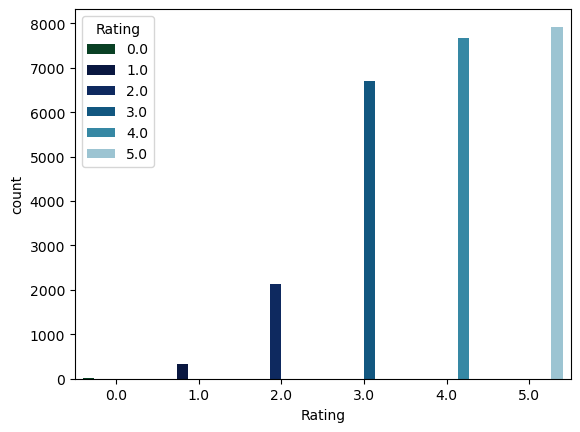

In [18]:

sns.barplot(x="Rating", y="count",data = ratingscount,hue="Rating",palette="ocean")
plt.show()


In [19]:
df_copy = df.copy()

In [20]:
df_copy.head()

,ID,Name,Location,City,CategoryName,Image,Phone
0,ID,Name,Location,City,CategoryName,Image,Phone
1,1,الحمد للأجهزه الكهربائيه,"شارع الملك حفني,عصافره بحري",Alexandria,Electrical Appliance,https://lh3.googleusercontent.com/LVmRtjE1rKJG...,35525080
2,2,شركة الفارس,"شارع جمال عبد الناصر,امام السواق الشريف",Alexandria,Electrical Appliance,https://lh5.googleusercontent.com/p/AF1QipMDx7...,1229291521
3,3,LG shaheen,"55 Port Said St, Al Ibrahimeyah Bahri WA Sidi ...",Alexandria,Electrical Appliance,https://lh5.googleusercontent.com/p/AF1QipMo2m...,1221163393
4,4,Hany-Electricity Machines,"5 Mohammed Hasan Fahmy, Al Ibrahimeyah Qebli W...",Alexandria,Electrical Appliance,None,None


In [21]:
df_copy= df_copy.drop(0)
df_copy.head()

,ID,Name,Location,City,CategoryName,Image,Phone
1,1,الحمد للأجهزه الكهربائيه,"شارع الملك حفني,عصافره بحري",Alexandria,Electrical Appliance,https://lh3.googleusercontent.com/LVmRtjE1rKJG...,35525080
2,2,شركة الفارس,"شارع جمال عبد الناصر,امام السواق الشريف",Alexandria,Electrical Appliance,https://lh5.googleusercontent.com/p/AF1QipMDx7...,1229291521
3,3,LG shaheen,"55 Port Said St, Al Ibrahimeyah Bahri WA Sidi ...",Alexandria,Electrical Appliance,https://lh5.googleusercontent.com/p/AF1QipMo2m...,1221163393
4,4,Hany-Electricity Machines,"5 Mohammed Hasan Fahmy, Al Ibrahimeyah Qebli W...",Alexandria,Electrical Appliance,None,None
5,5,معرض جمال التونى للأجهزة الكهربائية,"شارع التوحيد، , Bab Sharqi حي , Alexandria Go...",Alexandria,Electrical Appliance,None,None


In [22]:
ratings_with_name=rating_df.merge(df_copy,on="ID")
ratings_with_name.head()

,User_id,ID,Rating,Name,Location,City,CategoryName,Image,Phone
0,2001,1,3.0,الحمد للأجهزه الكهربائيه,"شارع الملك حفني,عصافره بحري",Alexandria,Electrical Appliance,https://lh3.googleusercontent.com/LVmRtjE1rKJG...,35525080
1,2002,1,2.0,الحمد للأجهزه الكهربائيه,"شارع الملك حفني,عصافره بحري",Alexandria,Electrical Appliance,https://lh3.googleusercontent.com/LVmRtjE1rKJG...,35525080
2,2003,1,3.0,الحمد للأجهزه الكهربائيه,"شارع الملك حفني,عصافره بحري",Alexandria,Electrical Appliance,https://lh3.googleusercontent.com/LVmRtjE1rKJG...,35525080
3,2004,1,3.0,الحمد للأجهزه الكهربائيه,"شارع الملك حفني,عصافره بحري",Alexandria,Electrical Appliance,https://lh3.googleusercontent.com/LVmRtjE1rKJG...,35525080
4,2005,1,3.0,الحمد للأجهزه الكهربائيه,"شارع الملك حفني,عصافره بحري",Alexandria,Electrical Appliance,https://lh3.googleusercontent.com/LVmRtjE1rKJG...,35525080


In [23]:
num_rating_df=ratings_with_name.groupby('Name').count()['Rating'].reset_index()
num_rating_df.rename(columns={'Rating':'num_ratings'},inplace=True)
num_rating_df

,Name,num_ratings
0,"""Gamal Home Furniture"" معرض أثاث",40
1,#Orapy_بدل_افراح,40
2,( ستوديو ميدو ) Studio Medo High Class,40
3,A&M beauty salon,40
4,ADRIANO SUITS,40
...,...,...
686,نورهان للأثاث,30
687,هاجر عبدالغني Beauty House,20
688,هايبر السعد,25
689,هندام للأدوات المنزلية,25


In [24]:
ratings_with_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24765 entries, 0 to 24764
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User_id       24765 non-null  int64  
 1   ID            24765 non-null  object 
 2   Rating        24765 non-null  float64
 3   Name          24765 non-null  object 
 4   Location      24765 non-null  object 
 5   City          24765 non-null  object 
 6   CategoryName  24765 non-null  object 
 7   Image         24765 non-null  object 
 8   Phone         24765 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.7+ MB


In [25]:
avg_rating_df=ratings_with_name.groupby('Name')['Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Rating':'avg_ratings'},inplace=True)
avg_rating_df

,Name,avg_ratings
0,"""Gamal Home Furniture"" معرض أثاث",3.450000
1,#Orapy_بدل_افراح,4.375000
2,( ستوديو ميدو ) Studio Medo High Class,3.900000
3,A&M beauty salon,3.900000
4,ADRIANO SUITS,3.075000
...,...,...
686,نورهان للأثاث,3.633333
687,هاجر عبدالغني Beauty House,4.850000
688,هايبر السعد,3.240000
689,هندام للأدوات المنزلية,4.040000


In [26]:
popular_df = num_rating_df.merge(avg_rating_df,on="Name")
popular_df

,Name,num_ratings,avg_ratings
0,"""Gamal Home Furniture"" معرض أثاث",40,3.450000
1,#Orapy_بدل_افراح,40,4.375000
2,( ستوديو ميدو ) Studio Medo High Class,40,3.900000
3,A&M beauty salon,40,3.900000
4,ADRIANO SUITS,40,3.075000
...,...,...,...
686,نورهان للأثاث,30,3.633333
687,هاجر عبدالغني Beauty House,20,4.850000
688,هايبر السعد,25,3.240000
689,هندام للأدوات المنزلية,25,4.040000


In [27]:
popular_df['num_ratings'].value_counts()



num_ratings
40     361
30      58
20      51
25      41
10      35
60      28
35      26
39       8
50       7
41       6
36       6
15       6
29       5
45       5
42       4
22       4
19       3
46       3
37       3
27       2
34       2
31       2
38       2
43       2
24       2
70       2
26       1
44       1
81       1
72       1
33       1
49       1
17       1
110      1
1        1
55       1
63       1
64       1
99       1
52       1
65       1
61       1
28       1
Name: count, dtype: int64

In [28]:
df_copy.columns

Index(['ID', 'Name', 'Location', 'City', 'CategoryName', 'Image', 'Phone'], dtype='object', name=0)

In [29]:
popular_df=popular_df.merge(df_copy,on='Name').drop_duplicates('Name')[['ID','Name','Location','City','CategoryName','Image','Phone','num_ratings','avg_ratings']]

In [30]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [31]:
popular_df.head()

,ID,Name,Location,City,CategoryName,Image,Phone,num_ratings,avg_ratings
0,539,"""Gamal Home Furniture"" معرض أثاث",432 منطقة ' ط ' البوابة الثانية القديمة خفرع، ...,Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipMCXu...,1113150579,40,3.450
1,588,#Orapy_بدل_افراح,بجوار جرند اوتيل، احمد عرابي، 26 يوليو،,Giza,Suits,https://lh5.googleusercontent.com/p/AF1QipOy32...,1117581051,40,4.375
2,899,( ستوديو ميدو ) Studio Medo High Class,"٦ Mohammed Sabry Mbdy, El Sheikh Zayed, Ismail...",Ismailia,Photographer,https://lh5.googleusercontent.com/p/AF1QipOEOJ...,1225832209,40,3.900
3,606,A&M beauty salon,١٩٥شارع، محور 26 يوليو، مدينة الأعلام،، حي الع...,Giza,Makeup Artist,https://lh5.googleusercontent.com/p/AF1QipO3ig...,1003852842,40,3.900
4,842,ADRIANO SUITS,"El-Shohada City, El Shohada, Menofia Governor...",Menofia,Suits,https://lh5.googleusercontent.com/p/AF1QipPZBO...,1006706746,40,3.075


In [32]:
popular_df.shape

(691, 9)

In [33]:
train_df = popular_df.copy()

In [35]:
train_df['CategoryName'].value_counts()

CategoryName
Furniture               126
Electrical Appliance    116
Wedding Hall            113
Kitchen Tools            75
Photographer             67
Suits                    66
Dresses                  65
Makeup Artist            63
Name: count, dtype: int64

# Model train 

In [39]:
features = ['City', 'CategoryName']
train_df['combined_features'] = train_df[features].apply(lambda x: ' '.join(x), axis=1)

In [40]:
train_df.head()

,ID,Name,Location,City,CategoryName,Image,Phone,num_ratings,avg_ratings,combined_features
0,539,"""Gamal Home Furniture"" معرض أثاث",432 منطقة ' ط ' البوابة الثانية القديمة خفرع، ...,Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipMCXu...,1113150579,40,3.450,Giza Furniture
1,588,#Orapy_بدل_افراح,بجوار جرند اوتيل، احمد عرابي، 26 يوليو،,Giza,Suits,https://lh5.googleusercontent.com/p/AF1QipOy32...,1117581051,40,4.375,Giza Suits
2,899,( ستوديو ميدو ) Studio Medo High Class,"٦ Mohammed Sabry Mbdy, El Sheikh Zayed, Ismail...",Ismailia,Photographer,https://lh5.googleusercontent.com/p/AF1QipOEOJ...,1225832209,40,3.900,Ismailia Photographer
3,606,A&M beauty salon,١٩٥شارع، محور 26 يوليو، مدينة الأعلام،، حي الع...,Giza,Makeup Artist,https://lh5.googleusercontent.com/p/AF1QipO3ig...,1003852842,40,3.900,Giza Makeup Artist
4,842,ADRIANO SUITS,"El-Shohada City, El Shohada, Menofia Governor...",Menofia,Suits,https://lh5.googleusercontent.com/p/AF1QipPZBO...,1006706746,40,3.075,Menofia Suits


In [41]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['combined_features'])

In [43]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.74735086, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.53593244, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.58335143,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.58335143,
         0.        ]])

In [87]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.       , 0.4916333, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.4916333, 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
        1.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
        1.       ]])

In [84]:
def recommend_wedding_planners(City, CategoryName, cosine_sim=cosine_sim):
    indices = train_df.index[(train_df['City'] == City) & (train_df['CategoryName'] == CategoryName)]
    sim_scores = list(enumerate(cosine_sim[indices[0]]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:]  #similar wedding planners
    
    wedding_indices = [i[0] for i in sim_scores]
    
    wedding_indices = [i[0] for i in sim_scores]
    
    top_planners = train_df.iloc[wedding_indices][['Name', 'Location', 'City', 'CategoryName', 'Image','Phone','avg_ratings']]
    filtered_planners = top_planners[(top_planners['City'] == City) & (top_planners['CategoryName'] == CategoryName)]
    filtered_planners = filtered_planners.sort_values(by='avg_ratings', ascending=False)  # Sort by rating
    final_recommended = filtered_planners[['Name', 'Location', 'City', 'CategoryName', 'Image','Phone','avg_ratings']]
    # .values.tolist()
    return final_recommended

In [85]:
city = 'Giza'
category_name = 'Furniture'
recommendations = recommend_wedding_planners(city, category_name)
recommendations

,Name,Location,City,CategoryName,Image,Phone,avg_ratings
171,NOGAL Furniture,أول الشيخ زايد، محافظة الجيزة,Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipP5Vy...,238519333,4.275
116,Kabbani furniture Faisal - قبانى للأثاث فيصل,شارع الملك فيصل، أولى الهرم، الطالبية، محافظة ...,Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipPGt5...,1099989800,4.250
289,أريج للأثاث,الروضة،، أول الشيخ زايد، محافظة الجيزة,Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipOLCj...,1003585405,4.150
323,ارت هوم,"2, الجيزة, الهرم",Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipOj9E...,237721364,4.150
476,صوفا أرت,البحر الأعظم، ساقية مكي، الجيزة،,Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipMuYn...,1116188862,4.025
570,قباني للأثاث 6 أكتوبر,المحور المركزى بعد، ميدان النجدة، محافظة الجيزة,Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipOTTS...,1145451111,3.950
688,مول دمياط للأثاث,"امتداد ش فيصل - تقاطع, محور المريوطية، فيصل مح...",Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipNh8W...,1001106057,3.900
379,اي هوم للاثاث,27 عمر بن الخطاب، الدقي، قسم الدقي، محافظة الج...,Giza,Furniture,https://lh4.googleusercontent.com/Q3TfXMQVUrAm...,1099961100,3.850
322,ارابيسك للاثاث,"٥ شارع المساكن متفرع من كفر طهرمس الطالبيه, شا...",Giza,Furniture,https://lh5.googleusercontent.com/p/AF1QipPYle...,1200776405,3.775
479,عبد الرحيم عمرو,147 الهرم، الكوم الأخضر، الهرم، محافظة الجيزة,Giza,Furniture,https://lh5.googleusercontent.com/7swj-jgtCkLt...,233855166,3.725


In [86]:
city = 'Alexandria'
category_name = 'Wedding Hall'
recommendations1 = recommend_wedding_planners(city, category_name)
recommendations1

,Name,Location,City,CategoryName,Image,Phone,avg_ratings
215,Sea Rena Life - Wedding Venue,"ST Front of, Al Masala, Green Plaza, Alexandri...",Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipMPzl...,34291111,5.000000
213,Sea Garden Open Air Hall,"3 Al Kornish, Al Meks, Dekhela, Alexandria Gov...",Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipNxTa...,1002299021,5.000000
88,Grand Sea Rena - Wedding Venue,"Ezbet El-Nozha, Sidi Gaber, Alexandria Governo...",Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipO53z...,1227404866,5.000000
200,Royal Lamour Elite,"Nady Somoha Al Ryadi, Ezbet Saad, Sidi Gaber, ...",Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipOG8K...,1227009520,4.950000
504,قاعات كازابلانكا,"El Qasem, An Nasereyah (Al Kobaneyah Al Engli...",Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipP6yV...,1007574288,4.933333
538,قاعة داماس Damas Hall,معرض الأسكندرية الدولي - الشارع الخلفي - ميدان...,Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipMpbU...,1070949177,4.900000
89,Grand Sea Rena Wedding Venue - Alexandria / قا...,"Front Of, Green Plaza, Ezbet El-Nozha, Sidi Ga...",Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipONiI...,34228551,4.866667
564,قاعه داندى,"El Qasem, As Soyouf Qebli (Include Izbat Derba...",Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipPogf...,None,4.793103
500,قاعات المجمع الملكى,1 مسجد الرضوان، الدخيلة، قسم الدخيلة، الإسكندر...,Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipMGCU...,1222182718,4.640000
147,Marvella&vitonia hall,"Mustafa Kamel WA Bolkli, Sidi Gaber, Alexandri...",Alexandria,Wedding Hall,https://lh5.googleusercontent.com/p/AF1QipNlky...,None,4.576923


# model saving

In [88]:
import pickle
pickle.dump(train_df, open('train_df.pkl','wb'))
pickle.dump(cosine_sim, open('cosine_sim.pkl','wb'))